## Predicting players rating
In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.

The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.

Download the data in the same folder and run the following commmand to get it in the environment

About the Dataset

The ultimate Soccer database for data analysis and
machine learning

The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch.

+25,000 matches

+10,000 players

11 European Countries with their lead championship

Seasons 2008 to 2016

Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the
weekly updates

Team line up with squad formation (X, Y coordinates)

Betting odds from up to 10 providers

Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000
matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

### Importing Libraries

In [53]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler

In [126]:
conn = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

We can observe that there are many missing values.

In [56]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


### Finding and removing missing values:

,Total,Percent
attacking_work_rate,3230,1.755645
volleys,2713,1.474633
agility,2713,1.474633
balance,2713,1.474633
sliding_tackle,2713,1.474633


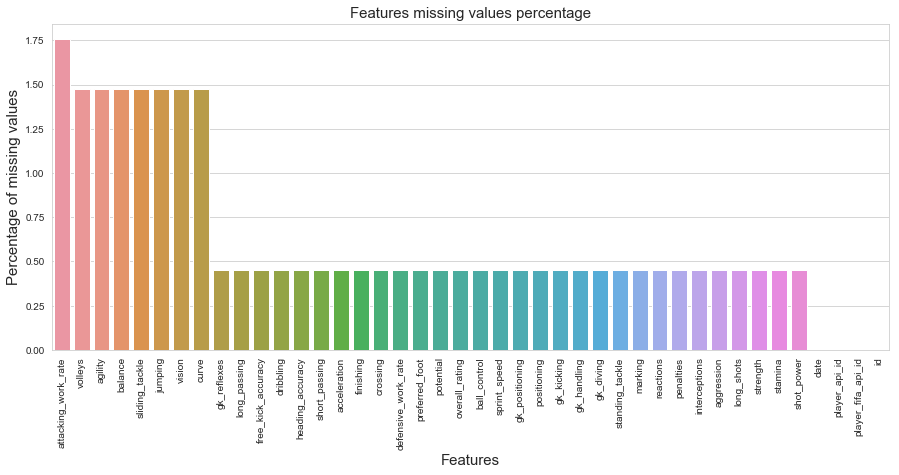

In [128]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Features missing values percentage', fontsize=15)
missing_data.head()

#### Observation:

Since only 1% of data is missing for all features, we can drop the missing values

### Dropping missing values

In [129]:
df = df.dropna()

In [130]:
df.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


There are no missing values after dropping the missing data.

#### Selecting only continuous data 

In [131]:
df_new = df.copy()
df_new = df_new.select_dtypes(["int64","float64"])
y = df_new['overall_rating']
X = df_new.drop('overall_rating',axis=1, inplace=True)


### Data Visualization

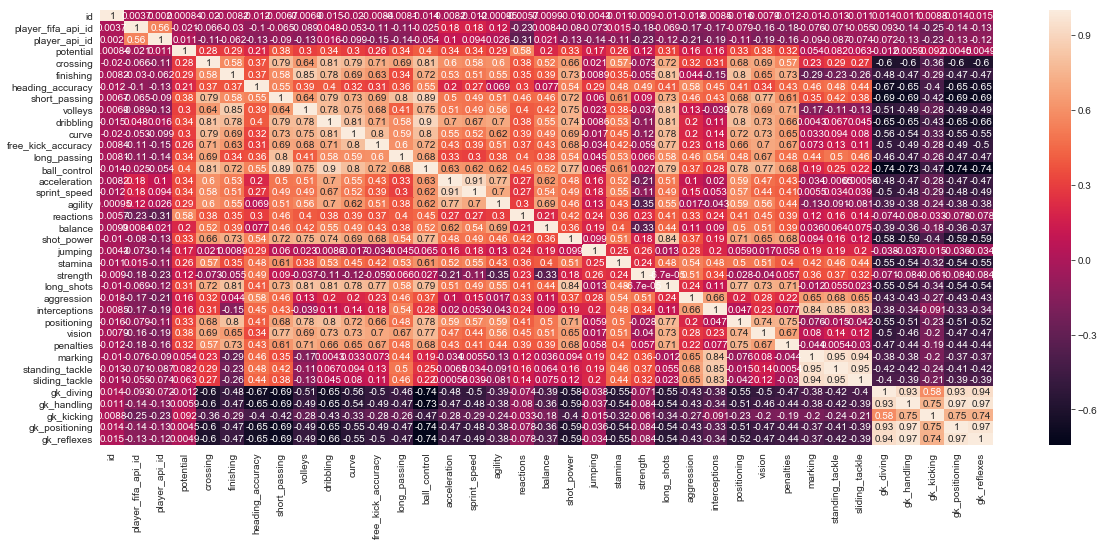

In [74]:
df_corr = df_new.corr()
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.heatmap(df_corr,annot=True)

### Removing multicollinearity
Removing features with more than 0.75 collinearity.

In [132]:
df_corr = df_new.corr().abs()
up_tri = df_corr.where(np.triu(np.ones(df_corr.shape[1]),k=1).astype(np.bool))
corr_features = [ column for column in up_tri.columns if any(up_tri[column]> 0.75)]
print(corr_features)

['short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'sprint_speed', 'agility', 'shot_power', 'long_shots', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_handling', 'gk_positioning', 'gk_reflexes']


In [133]:
df_no_corr = df_new.drop(corr_features,axis=1)
df_no_corr.head()

,id,player_fifa_api_id,player_api_id,potential,crossing,finishing,heading_accuracy,acceleration,reactions,balance,jumping,stamina,strength,aggression,interceptions,gk_diving,gk_kicking
0,1,218353,505942,71.0,49.0,44.0,71.0,60.0,47.0,65.0,58.0,54.0,76.0,71.0,70.0,6.0,10.0
1,2,218353,505942,71.0,49.0,44.0,71.0,60.0,47.0,65.0,58.0,54.0,76.0,71.0,70.0,6.0,10.0
2,3,218353,505942,66.0,49.0,44.0,71.0,60.0,47.0,65.0,58.0,54.0,76.0,63.0,41.0,6.0,10.0
3,4,218353,505942,65.0,48.0,43.0,70.0,60.0,46.0,65.0,58.0,54.0,76.0,62.0,40.0,5.0,9.0
4,5,218353,505942,65.0,48.0,43.0,70.0,60.0,46.0,65.0,58.0,54.0,76.0,62.0,40.0,5.0,9.0


### Feature splitting

In [134]:
X = df_no_corr

In [135]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",y_train.shape)
print("Y_test.shape : ",y_test.shape)

X_train Shape :  (144283, 17)
X_test Shape :  (36071, 17)
Y_train Shape :  (144283,)
Y_test.shape :  (36071,)


### Feature Standardisation

In [136]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Building Linear Regression Model

In [137]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting for test data

In [138]:
y_pred = lm.predict(X_test) 

### Performance measures

#### R-squared

In [139]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8413626067492807


#### Root mean squared error

In [140]:
print(sqrt(mean_squared_error(y_pred,y_test)))

2.783020737184604


Text(0.5,1,'Actual vs Predicted Rating for LinearRegression Model')

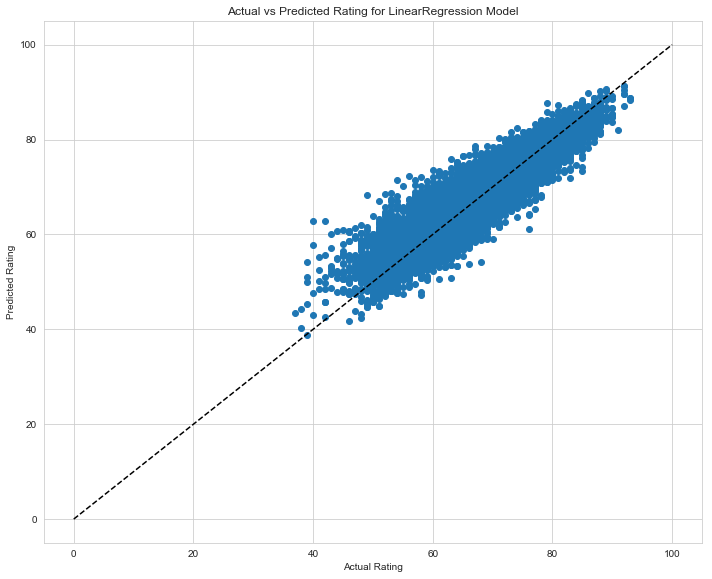

In [141]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted Rating for LinearRegression Model")

### DecisionTree Regression Model Build

In [142]:
regressor  = DecisionTreeRegressor(max_depth=15)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Prediction of test data

In [143]:
y_pred = regressor.predict(X_test)

### Performance Measures

#### R-squared

In [144]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.9123574201588698


#### Root mean squared error

In [145]:
print(sqrt(mean_squared_error(Y_pred,Y_test)))

1.8538221899901428


Text(0.5,1,'Actual vs Predicted Rating for DecisionTreeRegressor Model')

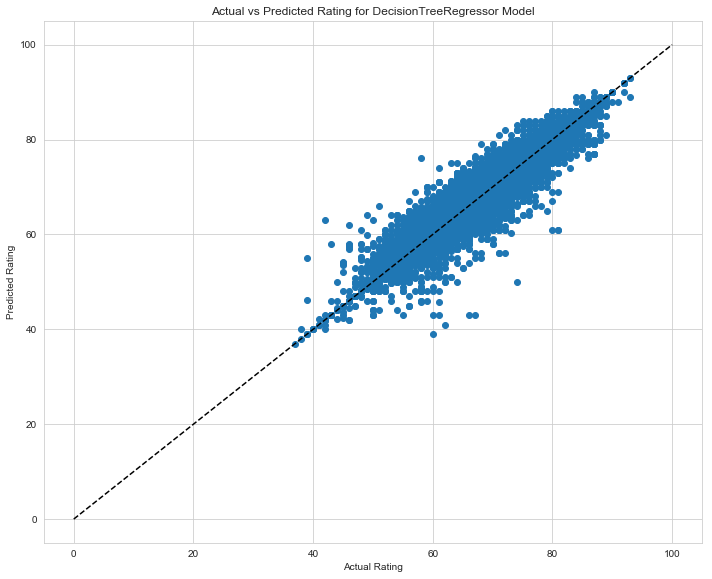

In [146]:
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted Rating for DecisionTreeRegressor Model")

### Conclusion:

1. The R-squared for Linear Regression was found to be 84%.

2. The R-squared for DecisionTree Regressor was found to be 91%.